# Credit Card Fraud Detection

## Dataset

   The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.The positive class (frauds) account for 0.172% of all transactions.<br/>
   It contains only numerical input variables which are the result of a [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis) transformation.Due to confidentiality issues, dataset cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.<br/>
   The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group  of [ULB](http://mlg.ulb.ac.be) (Université Libre de Bruxelles) on big data mining and fraud detection. 

In [1]:
# important libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

## Getting dataset

In [2]:
cc_data = pd.read_csv('creditcard.csv')

In [3]:
cc_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
cc_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Exploratory Data Analysis

Let's visualize the data and get the analysis started

In [6]:
cc_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

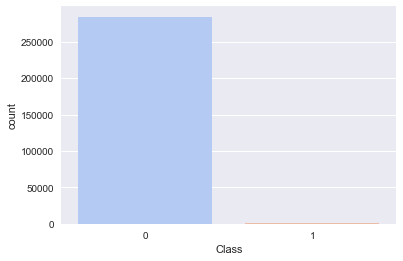

In [7]:
# as per the observation, data is very off balanced

sns.countplot(cc_data['Class'],palette='coolwarm')

In [8]:
#find out the percentage of each 'Class'

cc_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
no_fraud = round((cc_data['Class'].value_counts()[0] / len(cc_data['Class'])) *100,3)
fraud = round((cc_data['Class'].value_counts()[1] / len(cc_data['Class'])) *100,3)
print('\n')
print('No Fraud is {}% of total Transations'.format(no_fraud))
print('\n')
print('Fraud is {}% of total Transations'.format(fraud))



No Fraud is 99.827% of total Transations


Fraud is 0.173% of total Transations


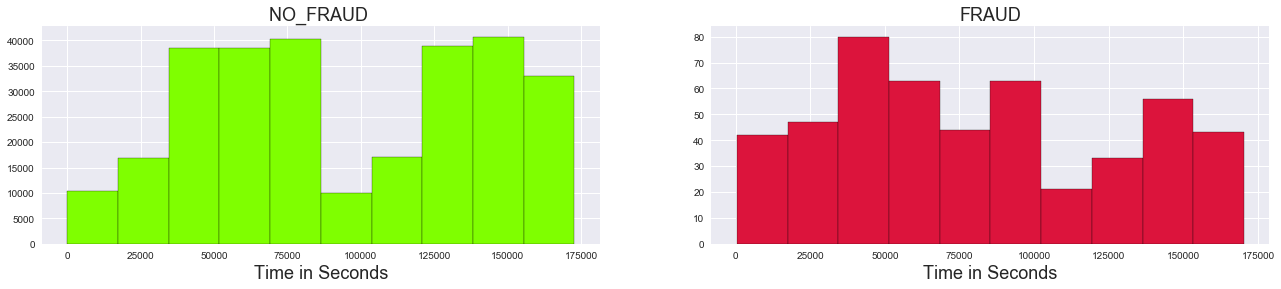

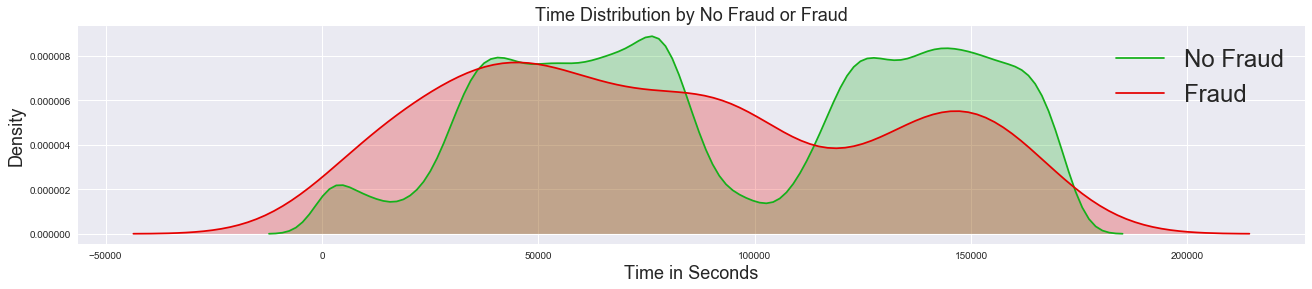

In [29]:
# Histogram
fig, ax = plt.subplots(1, 2, figsize=(22,4))
ax[0].hist(cc_data.loc[cc_data['Class'] == 0, 'Time'], color = 'chartreuse', edgecolor='black')
ax[0].set_title('NO_FRAUD ', fontsize = 18)
ax[0].set_xlabel('Time in Seconds', fontsize = 18)
ax[1].hist(cc_data.loc[cc_data['Class'] == 1, 'Time'], color = 'crimson', edgecolor='black')
ax[1].set_title('FRAUD', fontsize = 18)
ax[1].set_xlabel('Time in Seconds', fontsize = 18)


# Density Plot
fig, ax = plt.subplots(figsize=(22,4))
ax = sns.kdeplot(cc_data.loc[cc_data['Class'] == 0, 'Time'], shade=True, color=sns.xkcd_rgb["green"], label="No Fraud")
ax = sns.kdeplot(cc_data.loc[cc_data['Class'] == 1, 'Time'], shade=True, color=sns.xkcd_rgb["red"], label="Fraud")
ax.set_title('Time Distribution by No Fraud or Fraud', fontsize = 18)
ax.set_ylabel('Density', fontsize = 18)
ax.set_xlabel('Time in Seconds', fontsize = 18)
plt.legend(fontsize=24)
plt.show()

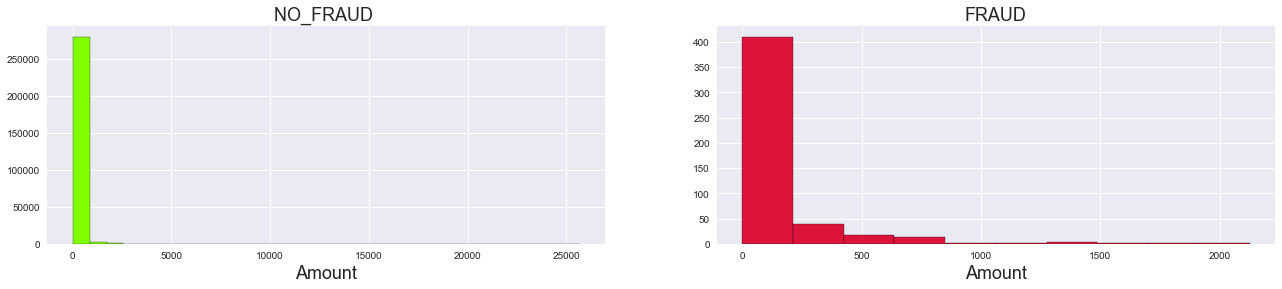

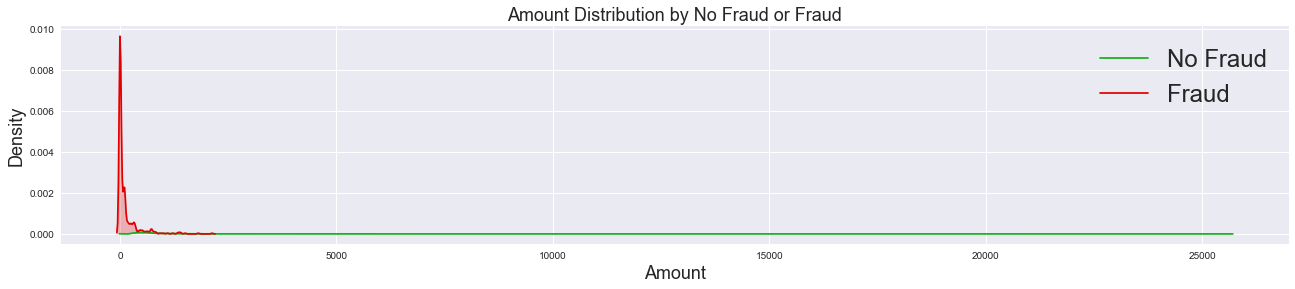

In [30]:
# Histogram
fig, ax = plt.subplots(1, 2, figsize=(22,4))
ax[0].hist(cc_data.loc[cc_data['Class'] == 0, 'Amount'],bins=30, color = 'chartreuse', edgecolor='black')
ax[0].set_title('NO_FRAUD ', fontsize = 18)
ax[0].set_xlabel('Amount', fontsize = 18)
ax[1].hist(cc_data.loc[cc_data['Class'] == 1, 'Amount'], color = 'crimson', edgecolor='black')
ax[1].set_title('FRAUD', fontsize = 18)
ax[1].set_xlabel('Amount', fontsize = 18)

# Density Plot
fig, ax = plt.subplots(figsize=(22,4))
ax = sns.kdeplot(cc_data.loc[cc_data['Class'] == 0, 'Amount'], shade=True, color=sns.xkcd_rgb["green"], label="No Fraud")
ax = sns.kdeplot(cc_data.loc[cc_data['Class'] == 1, 'Amount'], shade=True, color=sns.xkcd_rgb["red"], label="Fraud")
ax.set_title('Amount Distribution by No Fraud or Fraud', fontsize = 18)
ax.set_ylabel('Density', fontsize = 18)
ax.set_xlabel('Amount', fontsize = 18)
plt.legend(fontsize=24)
plt.show()

## Machine Learning

### Standardize the Variables

The features 'Time' and 'Amount' need to be standardize as other features are already scaled values.

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # create StandardScaler object

In [32]:
Time_scaled = scaler.fit_transform(cc_data['Time'].values.reshape(-1,1))

In [33]:
Amount_scaled = scaler.fit_transform(cc_data['Amount'].values.reshape(-1,1))

Creating the scaled 'cc_data' by replacing 'Amount' and 'Time' with scaled features

In [34]:
#drop the 'Time' and 'Amount' features

cc_data.drop(['Time','Amount'],axis=1,inplace=True)

#insert scaled Time and scaled Amount

cc_data['ScaledTime']= Time_scaled
cc_data['ScaledAmount'] = Amount_scaled

cc_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,ScaledTime,ScaledAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.996583,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.996583,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.996562,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.996562,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.996541,-0.073403


#### *Now the dataset is very off balance as only  0.173% of total transation is fraudulent. So we will select the random row from 'Class' which is 0 or No Fraud. We have total of 492 fraudulent transations, so we can select random 492 transations No Fraud class.*

#### *As the data is imbalanced, we are going to use 'Random under-sampling methode' to overcome this problem. Let's consider 10% of non fraudulent transations*

In [35]:
#first we can from the dataframe with fraudulent transations. this dataframe will have 492 rows

df_fraud = cc_data[cc_data['Class']==1]
len(df_fraud)

492

In [36]:
#now,for No Fraud dataframe we will select random 2000 of non fraudulent

df = cc_data[cc_data['Class']==0]

In [37]:
df_no_fraud = df.sample(n=2000)

len(df_no_fraud)

2000

In [38]:
df_new = pd.concat([df_fraud,df_no_fraud])

In [39]:
percent_fraud = round((df_new['Class'].value_counts()[1] / len(df_new['Class'])) *100,3)
print('Fraud is {}% of total Transations'.format(percent_fraud))
print('\n')

Fraud is 19.743% of total Transations




In [40]:
#now again we will select the random rows and create the equal_dist_df

equal_dist_df = df_new.sample(frac=1)

In [41]:
equal_dist_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,ScaledTime,ScaledAmount
44446,1.075408,-0.424037,1.283377,0.745533,-1.318082,-0.149243,-0.799433,0.281153,0.899174,-0.053602,...,-0.070862,0.043067,0.537152,0.112551,0.394787,-0.009669,0.018901,0,-1.113266,-0.209498
149366,2.133969,0.084221,-1.344173,0.370245,0.506153,-0.551953,0.127764,-0.395273,1.775898,-0.320576,...,-1.012445,0.211492,-1.042587,-0.156613,0.218820,-0.094089,-0.074700,0,-0.078459,-0.335318
11455,1.296762,-0.476986,0.835739,-0.169315,-1.080793,-0.592713,-0.672506,-0.167398,0.745368,0.060208,...,0.081605,0.061123,0.595499,0.399300,-0.288864,0.004756,0.011437,0,-1.577572,-0.273268
279531,2.128888,0.064103,-1.600692,0.180877,0.427847,-0.913699,0.316947,-0.421392,0.480645,-0.015756,...,0.828403,-0.105855,-0.648142,0.406307,-0.067656,-0.013226,-0.063986,0,1.560711,-0.349231
44314,-0.791617,0.712634,1.912039,2.286409,0.212831,1.379365,0.651410,0.506089,-1.230073,0.241761,...,-0.049149,0.123825,-0.329684,-0.157410,0.029805,0.085669,0.099827,0,-1.114488,0.066130


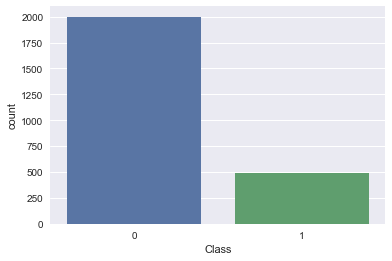

In [42]:
#count the Classes

sns.countplot(equal_dist_df['Class'])

### Train/Test split

In [43]:
X = equal_dist_df.loc[ : ,['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','ScaledTime','ScaledAmount']].values

y = equal_dist_df['Class']

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Models
* We will create all the 5 models

In [46]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C = 1)

# k-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Support Vector Machine
from sklearn.svm import SVC
svm = SVC()

# Random Forest (ensemble of Decision Trees)
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=1, random_state=0)

# Neural Network
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()

### Cross Validation

In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, X_train, y_train, scoring='accuracy', cv=10)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())               # accuracy measure
    print("Standard deviation:", scores.std())  # std measures how precise the measure is

In [48]:
display_scores(scores)

Scores: [ 0.98285714  0.96        0.98857143  0.94857143  0.95428571  0.97142857
  0.96551724  0.98275862  0.98265896  0.97109827]
Mean: 0.970774737322
Standard deviation: 0.012871278643


In [49]:
# create the classifier 
classifiers = [log_reg, knn, svm, forest, nn]

model_scores = []
for clf in classifiers:
    model_scores.append(cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=10))

In [50]:
models_df = pd.DataFrame(model_scores, columns=[1,2,3,4,5,6,7,8,9,10],
                               index=["LR", "KNN", "SVM", "Forest", "NN"])

In [51]:
models_df["Mean"] = models_df.mean(axis=1)
models_df

,1,2,3,4,5,6,7,8,9,10,Mean
LR,0.982857,0.960000,0.988571,0.948571,0.954286,0.971429,0.965517,0.982759,0.982659,0.971098,0.970775
KNN,0.977143,0.965714,0.982857,0.954286,0.954286,0.977143,0.977011,0.965517,0.976879,0.971098,0.970193
SVM,0.982857,0.954286,0.982857,0.931429,0.948571,0.960000,0.965517,0.977011,0.965318,0.971098,0.963894
Forest,0.960000,0.954286,0.942857,0.925714,0.942857,0.960000,0.936782,0.936782,0.953757,0.976879,0.948991
NN,0.982857,0.965714,0.982857,0.942857,0.954286,0.982857,0.977011,0.977011,0.971098,0.971098,0.970765


### Boxplot Cross Validation

Text(0.5,1,'Classification Accuracy using All Features')

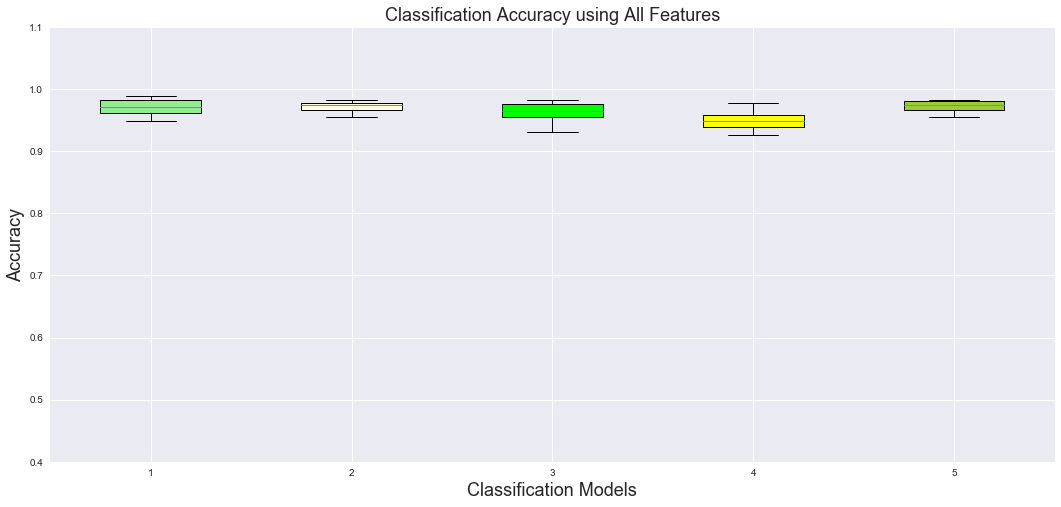

In [52]:
# BOXPLOT comparing models and comparing SVM using different feature subsets
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 8))
# rectangular box plot
bplot_models = axes.boxplot(model_scores, vert=True, patch_artist=True)

# fill with colors - Models
colors_d = ["lightgreen", "lightyellow", "lime", "yellow", "yellowgreen"]
for patch, color in zip(bplot_models['boxes'], colors_d):
    patch.set_facecolor(color)
    
    # adding axes labels
axes.yaxis.grid(True)
axes.set_xticks([y+1 for y in range(len(model_scores))])
axes.set_xlabel('Classification Models', fontsize=18)
axes.set_ylabel('Accuracy', fontsize=18)
axes.set_ylim((.4, 1.1))
axes.set_title('Classification Accuracy using All Features', fontsize = 18)

*1=LR, 2=KNN, 3=SVM, 4=Forest, 5=NN*

### Confusion Matrix and Classification Report

In [53]:
#Logistic Regression gives the best accuracy 
#so now fit the model log_reg = LogisticRegression(C = 1)

log_reg.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
prediction = log_reg.predict(X_test)

In [57]:
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
print(confusion_matrix(y_test,prediction))

[[588   6]
 [ 24 130]]


In [59]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.96      0.99      0.98       594
          1       0.96      0.84      0.90       154

avg / total       0.96      0.96      0.96       748



Text(0,0.5,'true label')

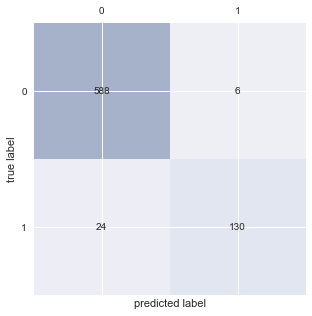

In [60]:
confmat = confusion_matrix(y_test,prediction)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

In [61]:
print("Accuracy on training set: {:.2f}".format(log_reg.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(log_reg.score(X_test, y_test)))

Accuracy on training set: 0.97
Accuracy on test set: 0.96


In [62]:
X_total = cc_data.drop('Class',axis=1)
y_total = cc_data['Class']

In [64]:
print("Accuracy on whole set: {:.2f}".format(log_reg.score(X_total, y_total)))

Accuracy on whole set: 0.99


## Discussion

1. The given dataset is skewed and imbalanced with only 0.17% data in one 'Class' - Fraud.
2. There are couple of ways you can handle imbalanced data in machine learning. Good read is available at [ImbalancedData](https://github.com/scikit-learn-contrib/imbalanced-learn)
3. I prefered to use Random under-sampling. I took all the fradulent transations and about 4 times more random non fradulent transations.
4. Though the ML model works well, I think, I could have created 2 separate data-frames at the begining-
  1) 80% random data to train the models
  2) 20% remaining data would be unseen. So, once the ML algorithm is finalized, the unseen data could be used.
5. In the end, I tested the model on complete datafram.


## Conclusion

The Logistic Regression model works with highest accuracy of 
1. 97% on training set
2. 96% on test set and
3. 99% on whole dataset